# importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_confusion_matrix
import plotly.express as px

In [2]:
df= pd.read_csv('c:/Users/RATHIKA/oasis/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

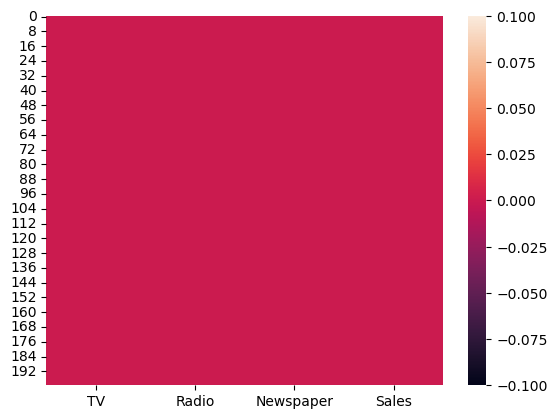

In [8]:
sns.heatmap(df.isnull())

# from the above heatmap, the data is clean and not necessory to handle missing data and more

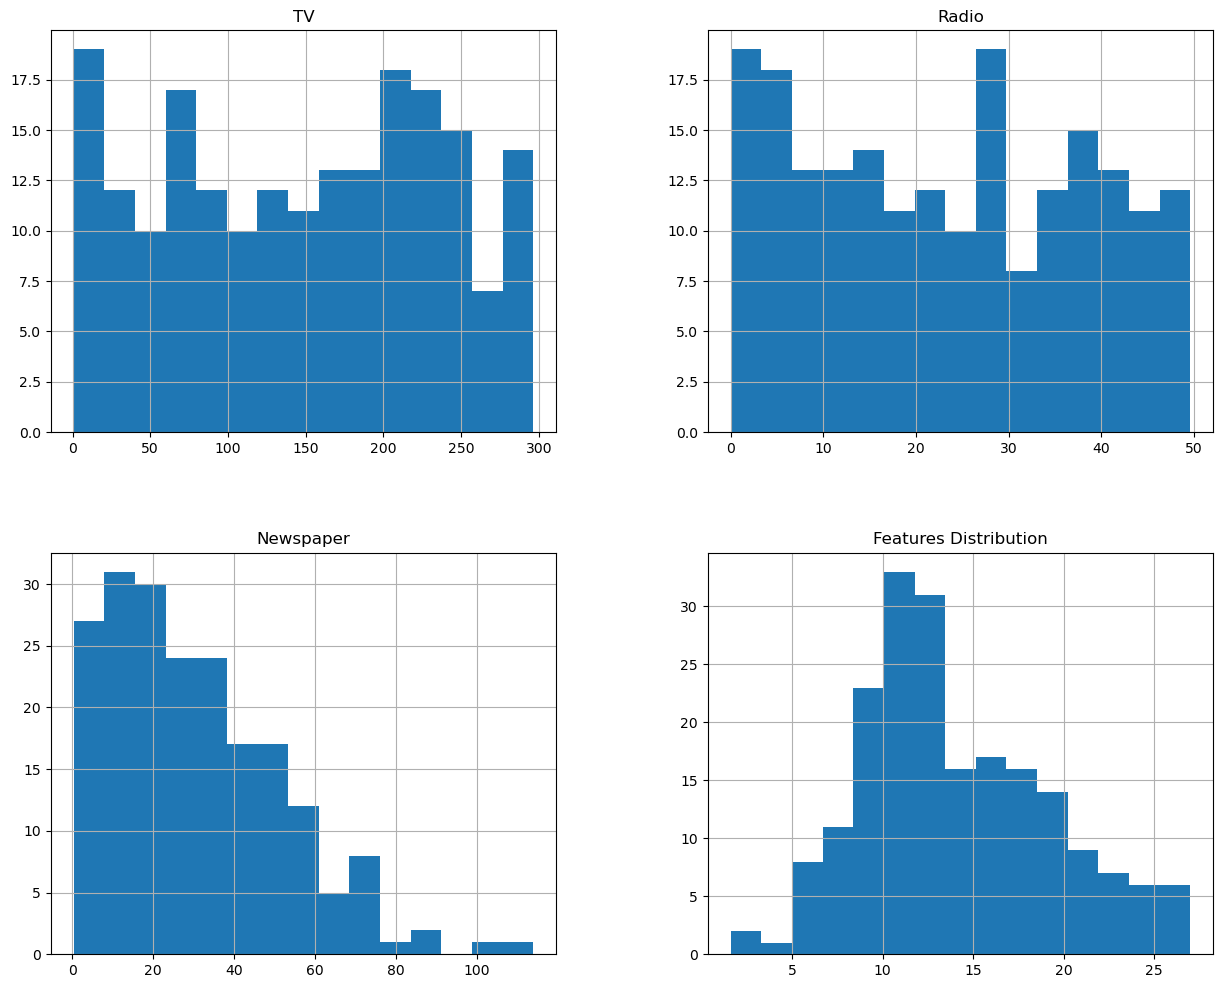

In [11]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

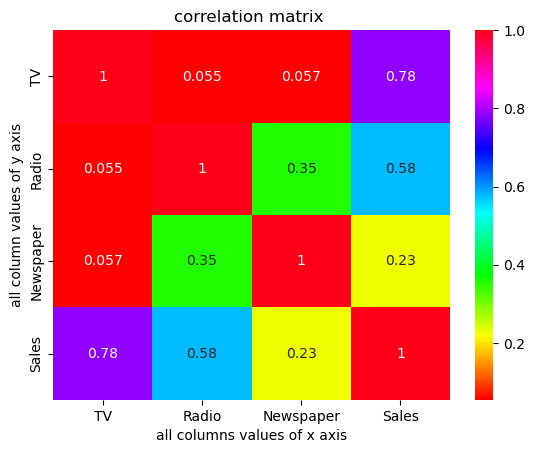

In [12]:
correlation = df.corr(method='pearson')
heatmap = sns.heatmap(correlation,annot =True,fmt='.2g',cmap='hsv')
heatmap.set(xlabel='all columns values of x axis',ylabel='all column values of y axis',title='correlation matrix ')
plt.show()

# the correlation matrix clearly shows that there is highly positive relationship with sales and tv compared to radio and newspaper. So sales increases with advertisement given on TV

In [13]:
# Getting features and target
X = df.drop(["Sales"], axis=1)
y = df["Sales"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#  Linear regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [18]:
reg_pred=regression.predict(X_test)

Text(0, 0.5, 'Predicted')

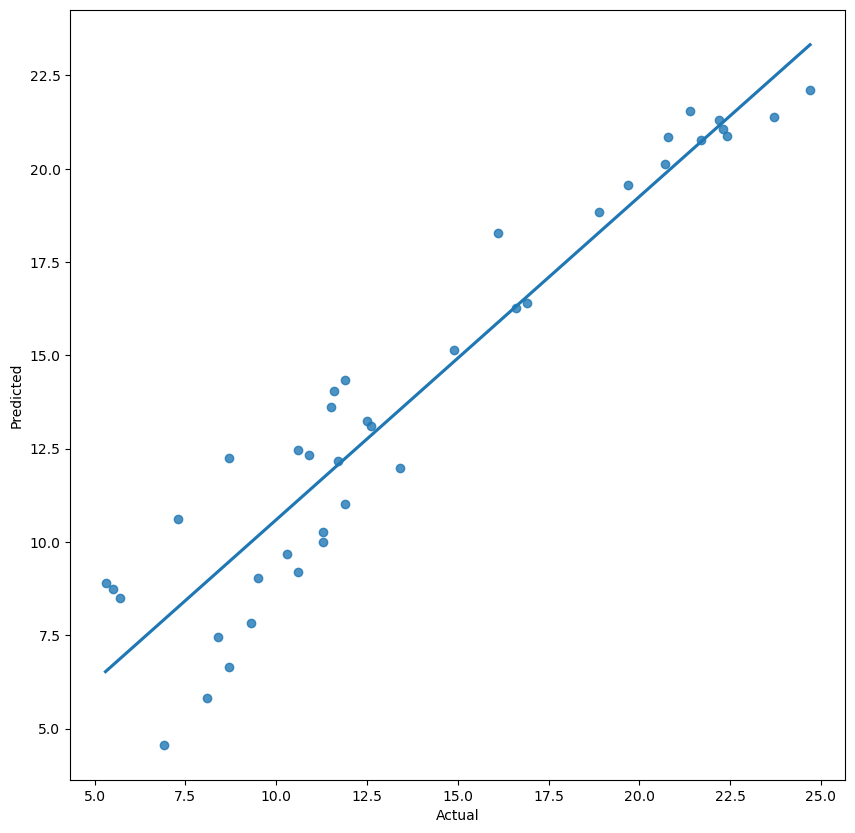

In [19]:
import seaborn as sns
plt.rcParams['figure.figsize'] =[10,10]
sns.regplot(x=y_test,y=reg_pred,ci=None, data=df)
plt.xlabel('Actual');
plt.ylabel('Predicted')


In [20]:
from sklearn.metrics import r2_score

In [21]:
score=r2_score(reg_pred,y_test)

In [22]:
print(" The accuracy of the model is :",score)
score_linear = score*100

 The accuracy of the model is : 0.8791069137120034


# Directly fit the values of X,y in Linear regression model

In [23]:
model=LinearRegression().fit(X,y)
r_sq=model.score(X,y)
print('The accuracy of the model is :',r_sq)

The accuracy of the model is : 0.8972106381789522


In [24]:
importance = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': model.coef_})
importance = importance.sort_values(by='Importance',ascending = False)


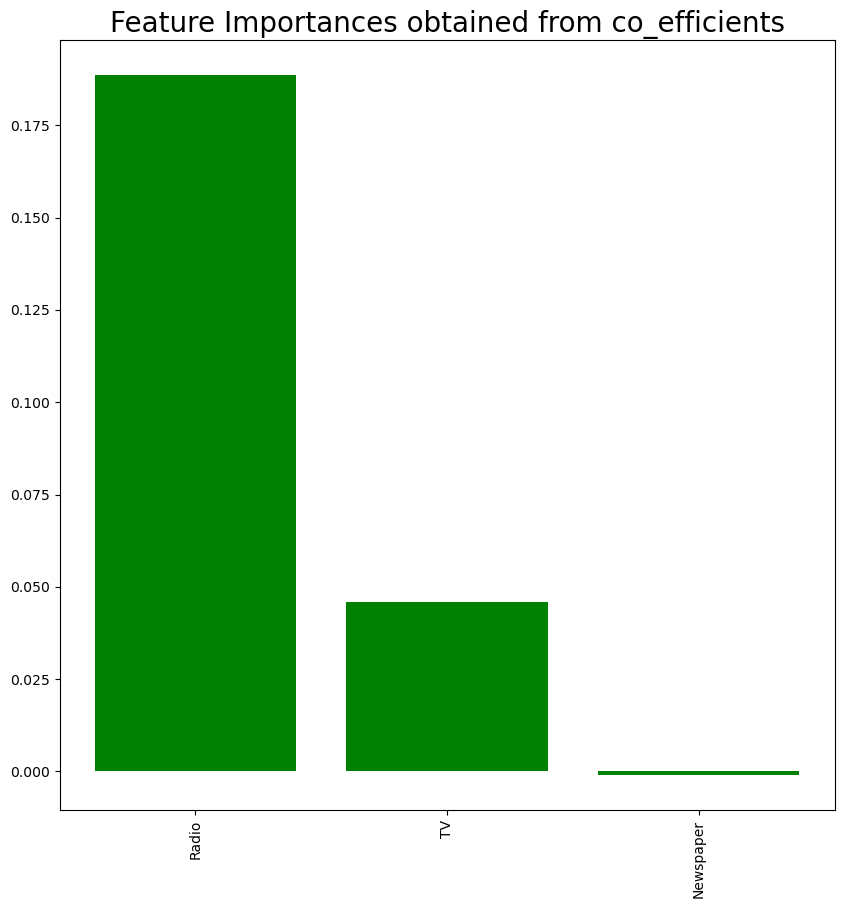

In [25]:
plt.bar(x=importance['Attribute'],height = importance['Importance'],color = 'Green')
plt.title('Feature Importances obtained from co_efficients', size = 20)
plt.xticks(rotation = 'vertical')
plt.show()
        

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [27]:
lasso_regressor=Lasso()

In [29]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [30]:
print(ridgecv.best_params_)

{'alpha': 1}


In [31]:
ridge_pred=ridgecv.predict(X_test)

Text(0, 0.5, 'Predicted')

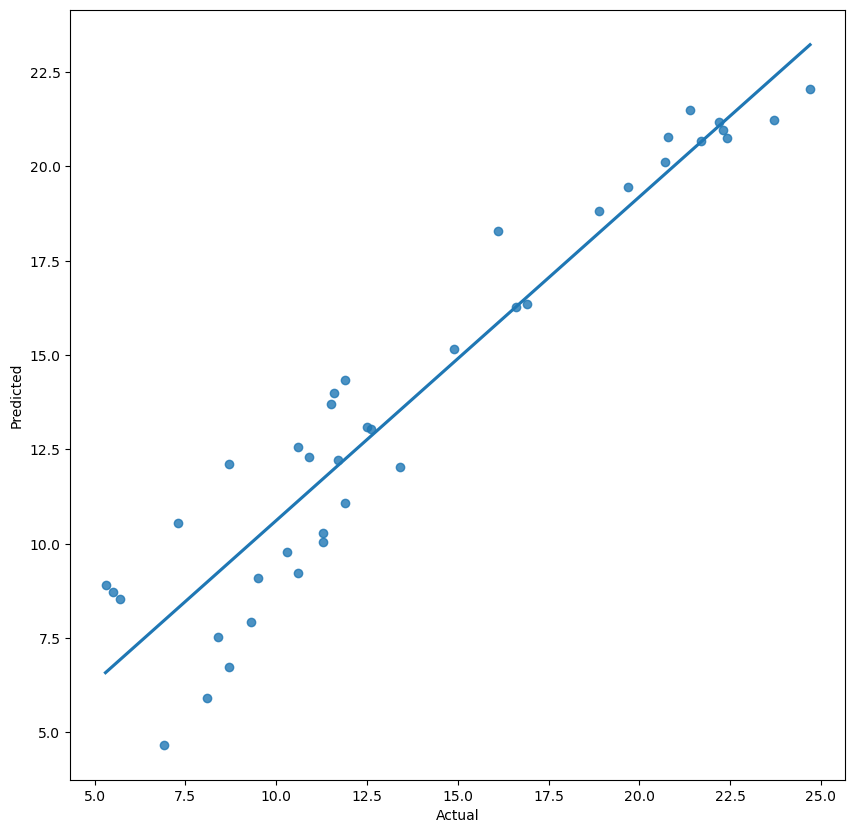

In [32]:
import seaborn as sns
sns.regplot(x=y_test,y=ridge_pred,ci=None, data=df)
plt.xlabel('Actual');
plt.ylabel('Predicted')


In [33]:
score=r2_score(ridge_pred,y_test)

In [34]:
print("The accuracy of the model is:",score)
score_lasso=score*100

The accuracy of the model is: 0.8777534897716464


# Advanced linear regression model using constant

In [35]:
import statsmodels.api as sm

In [36]:
x=sm.add_constant(X)

In [37]:
model = sm.OLS(y,x)

In [38]:
results = model.fit()

In [39]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        09:42:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [43]:
regressor = DecisionTreeRegressor(max_depth =3 ,random_state=100,min_samples_leaf=1)
model =regressor.fit(X_train,y_train)


[Text(0.5, 0.875, 'X[0] <= 108.6\nsquared_error = 25.936\nsamples = 160\nvalue = 14.1'),
 Text(0.25, 0.625, 'X[0] <= 32.75\nsquared_error = 7.411\nsamples = 56\nvalue = 9.434'),
 Text(0.125, 0.375, 'X[2] <= 9.0\nsquared_error = 3.873\nsamples = 20\nvalue = 6.795'),
 Text(0.0625, 0.125, 'squared_error = 1.707\nsamples = 3\nvalue = 3.2'),
 Text(0.1875, 0.125, 'squared_error = 1.573\nsamples = 17\nvalue = 7.429'),
 Text(0.375, 0.375, 'X[1] <= 42.3\nsquared_error = 3.358\nsamples = 36\nvalue = 10.9'),
 Text(0.3125, 0.125, 'squared_error = 1.858\nsamples = 32\nvalue = 10.444'),
 Text(0.4375, 0.125, 'squared_error = 0.372\nsamples = 4\nvalue = 14.55'),
 Text(0.75, 0.625, 'X[1] <= 26.85\nsquared_error = 17.875\nsamples = 104\nvalue = 16.613'),
 Text(0.625, 0.375, 'X[1] <= 10.05\nsquared_error = 3.957\nsamples = 57\nvalue = 13.595'),
 Text(0.5625, 0.125, 'squared_error = 0.809\nsamples = 26\nvalue = 11.946'),
 Text(0.6875, 0.125, 'squared_error = 2.406\nsamples = 31\nvalue = 14.977'),
 Text(0.

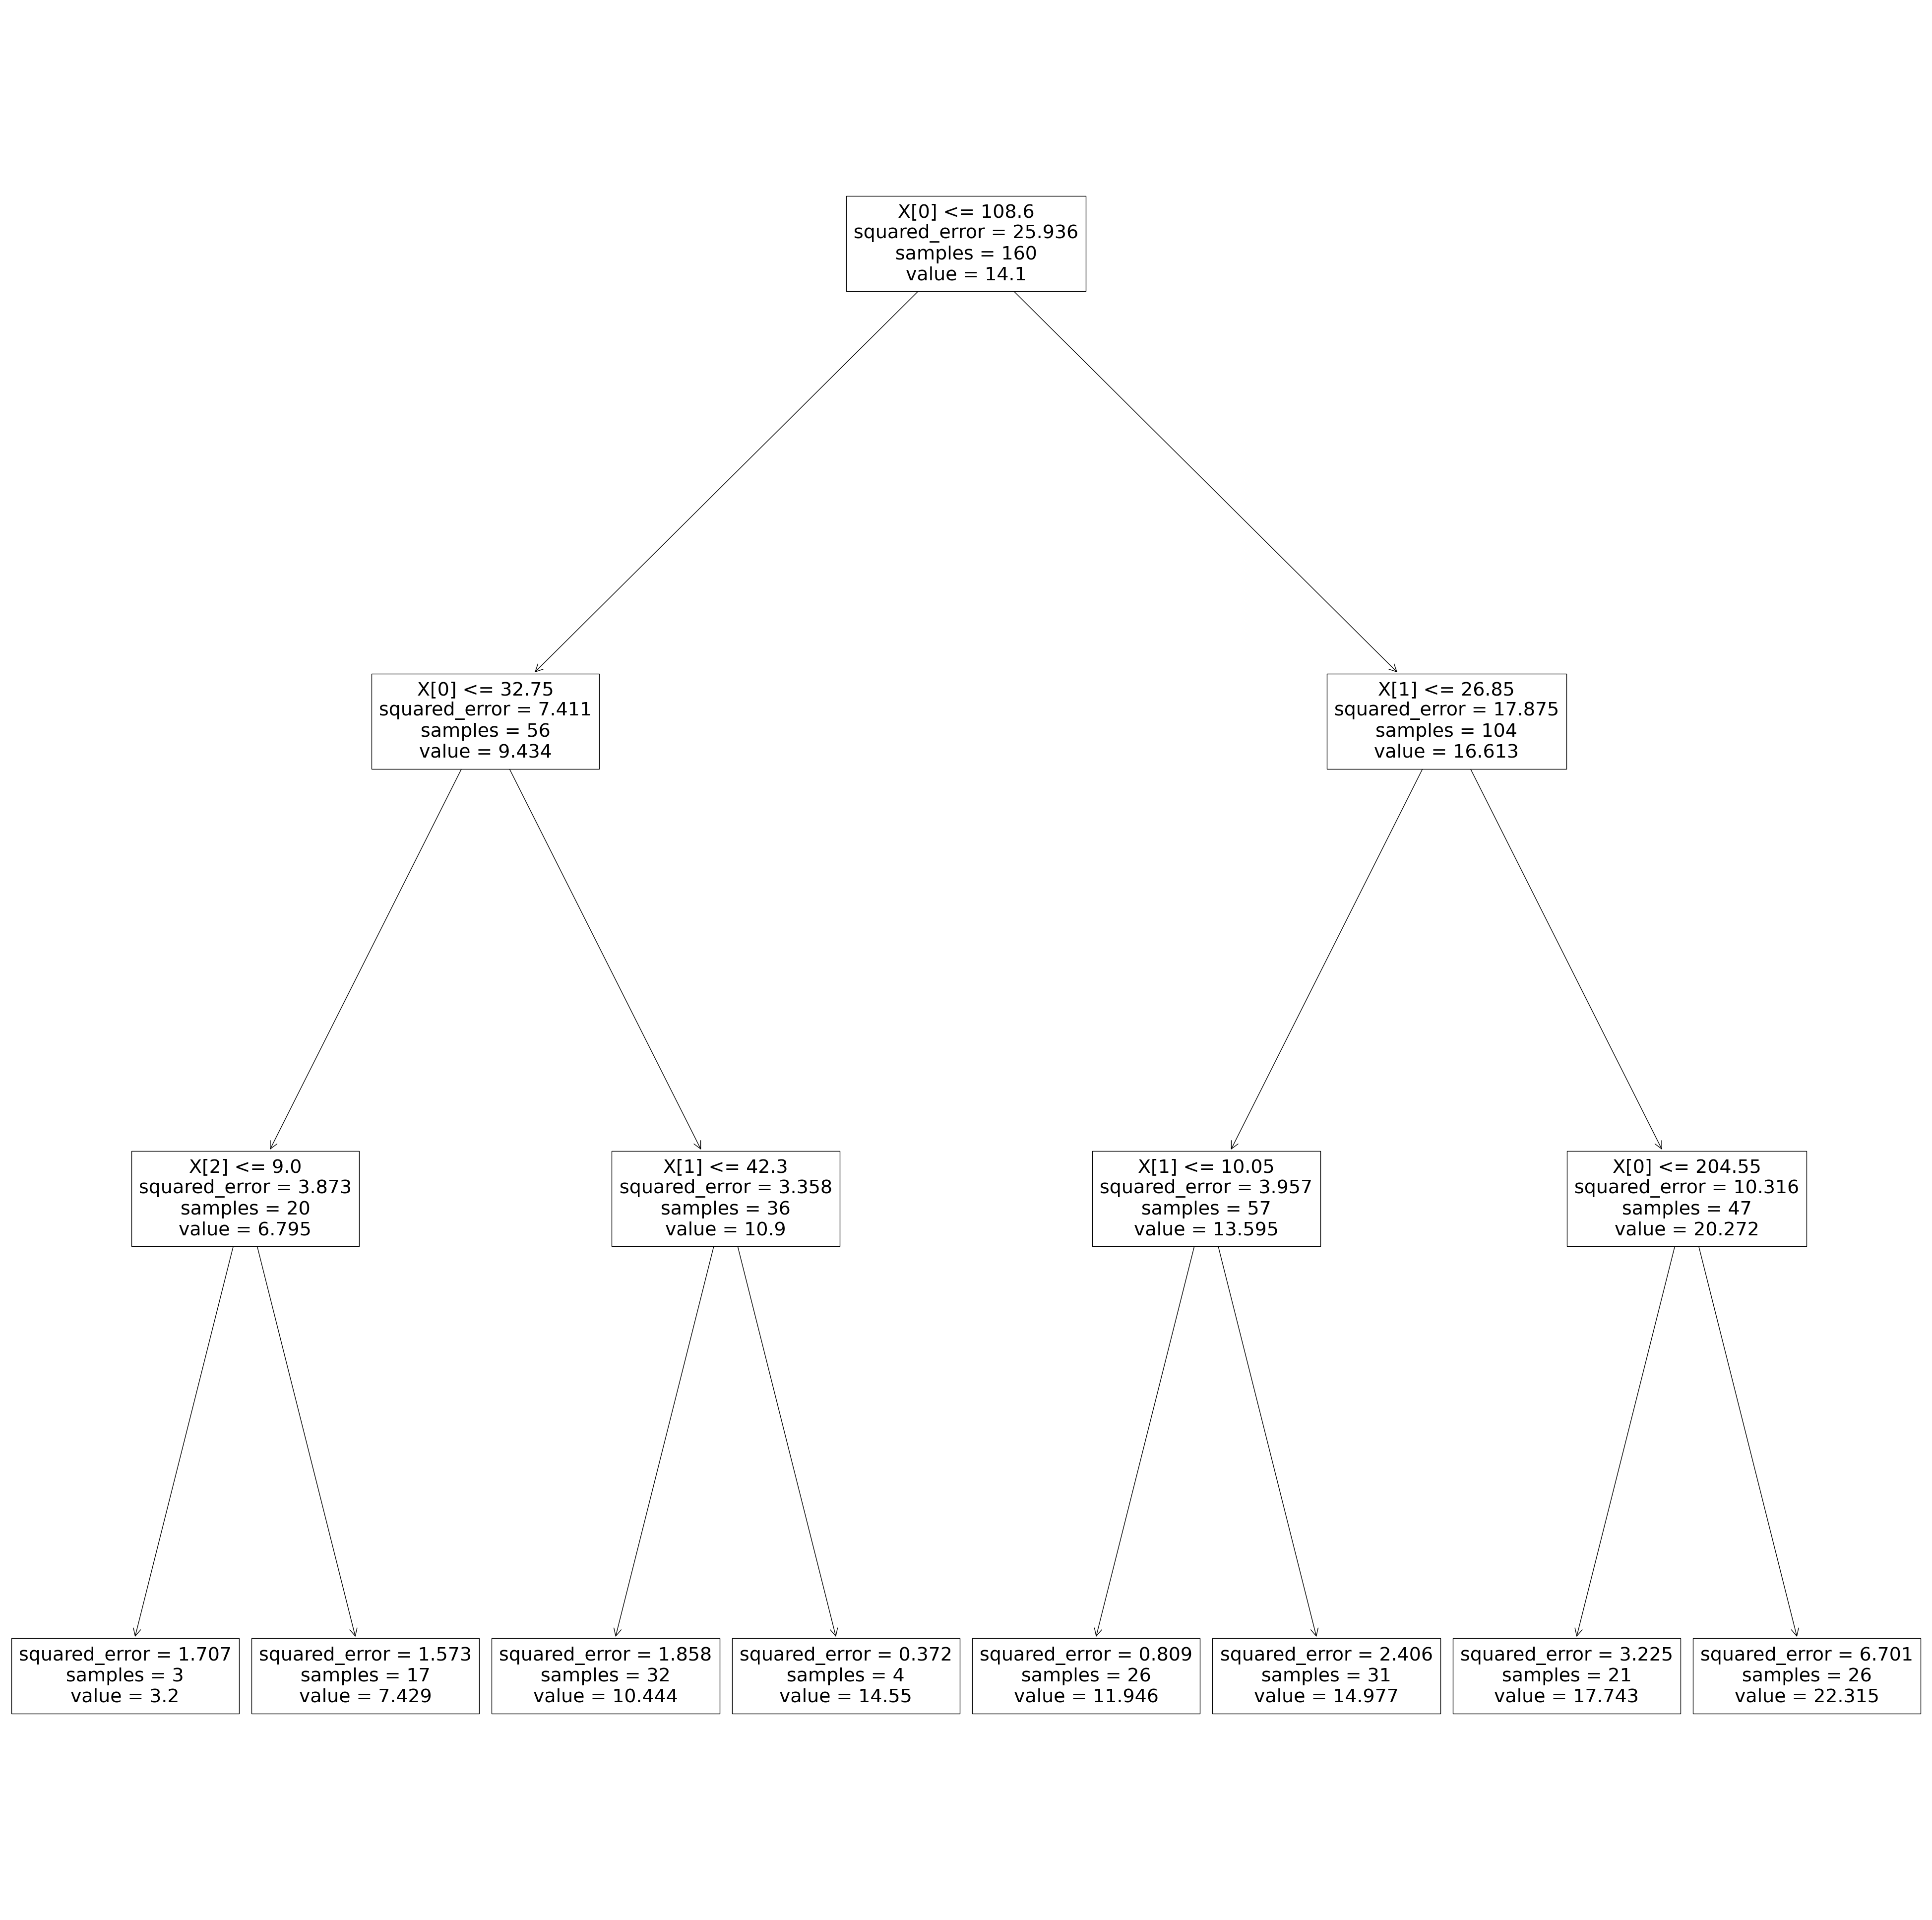

In [44]:
plt.figure(figsize=(50,50))
tree.plot_tree(regressor)

In [45]:
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Predicted')

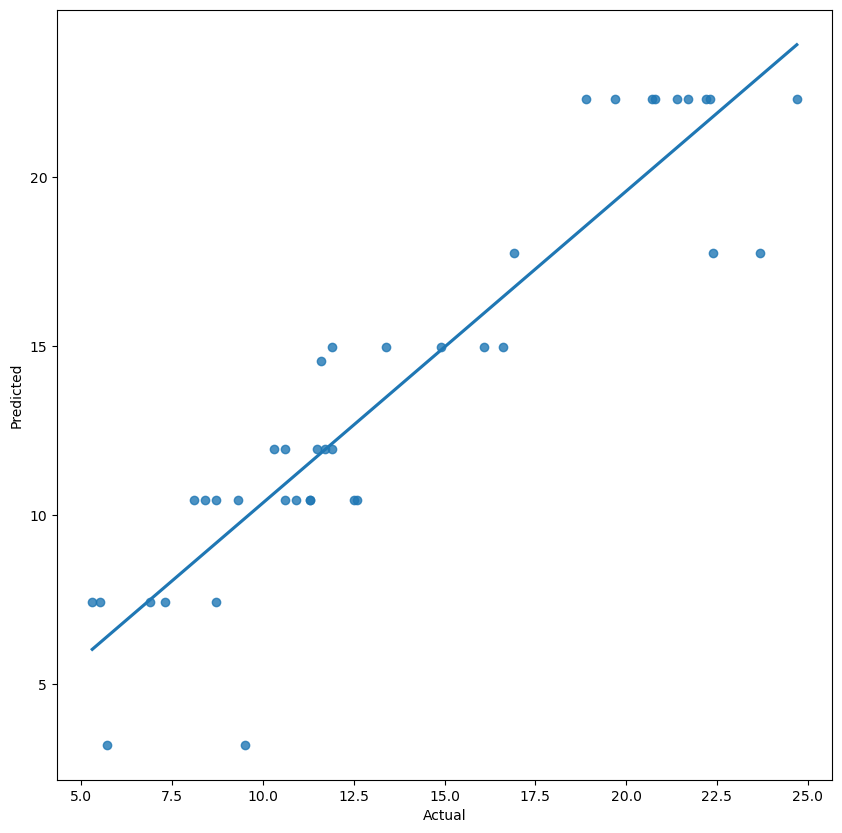

In [46]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None, data=df)
plt.xlabel('Actual');
plt.ylabel('Predicted')

In [47]:
from sklearn.metrics import r2_score

In [49]:
reg_pred=regressor.predict(X_test)
score=r2_score(reg_pred,y_test)

In [50]:
print("The accuracy of the model is:",score)
score_DT = score*100

The accuracy of the model is: 0.8431709239450353


# Random forest regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state = 0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [52]:
from sklearn import metrics
print('Root mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean Squared Error: 0.754359098838213


Text(0, 0.5, 'Predicted')

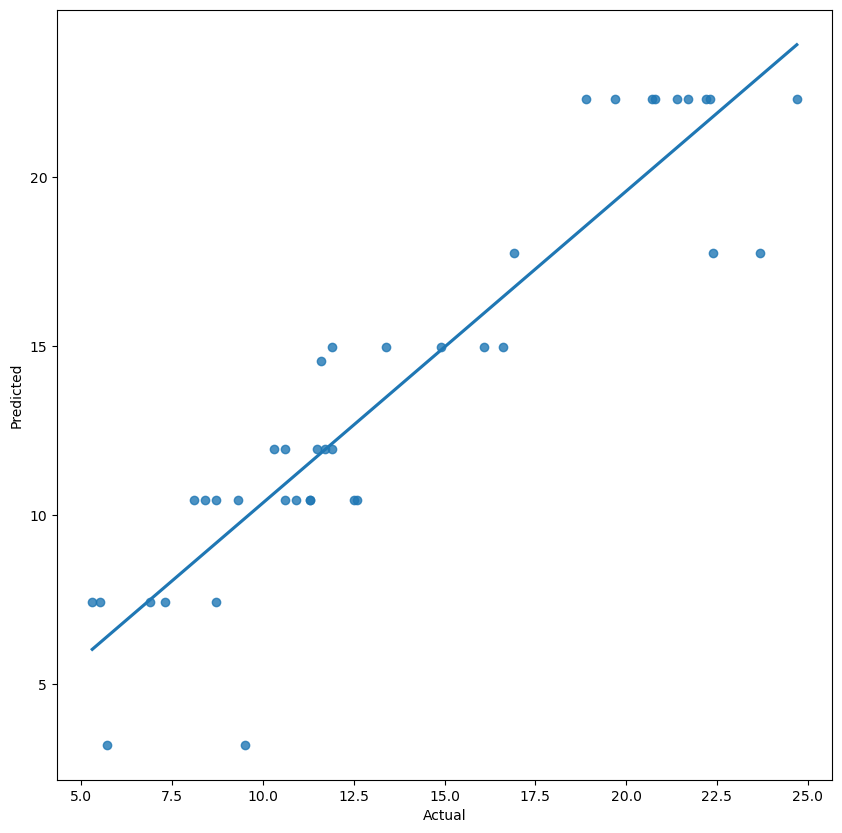

In [53]:
import seaborn as sns
sns.regplot(x=y_test,y=reg_pred,ci=None, data=df)
plt.xlabel('Actual');
plt.ylabel('Predicted')

In [54]:
reg_pred=regressor.predict(X_test)
score=r2_score(reg_pred,y_test)

In [55]:
print("The accuracy of the model is:",score)
score_RF = score*100

The accuracy of the model is: 0.9809034577984317


# Support Vector Regressor

In [56]:
from sklearn.svm import SVR


In [57]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [58]:
y_pred = regressor.predict(X_test)


In [59]:
reg_pred=regressor.predict(X_test)
score=r2_score(reg_pred,y_test)

In [60]:
print("The accuracy of the model is:",score)
score_SVR = score*100

The accuracy of the model is: 0.7781919098410419


Text(0, 0.5, 'Predicted')

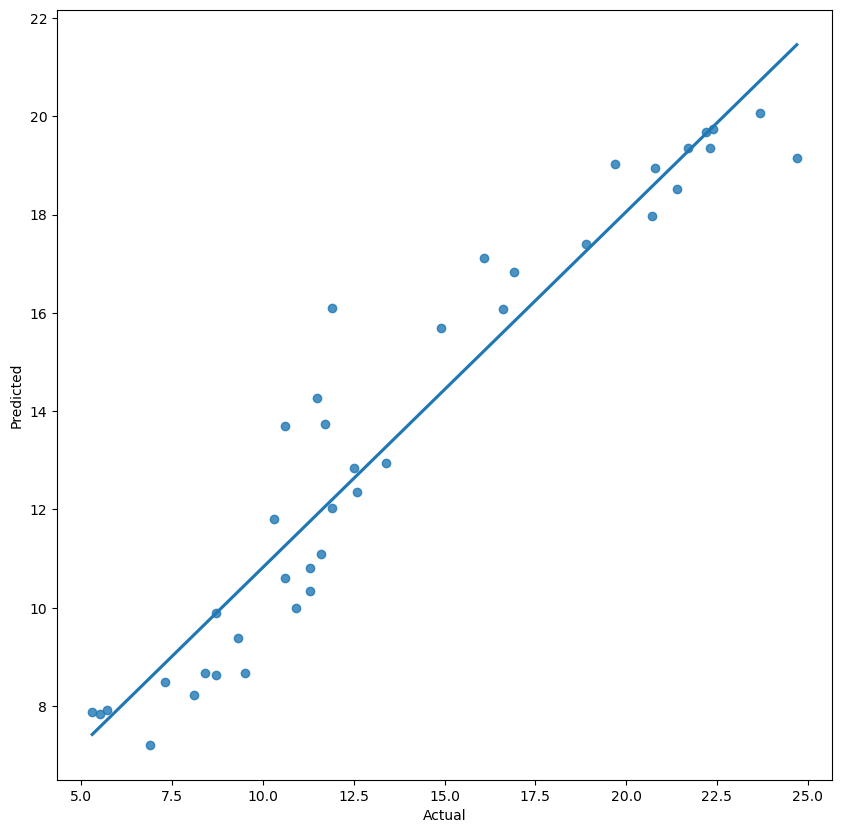

In [61]:
import seaborn as sns
sns.regplot(x=y_test,y=reg_pred,ci=None, data=df)
plt.xlabel('Actual');
plt.ylabel('Predicted')

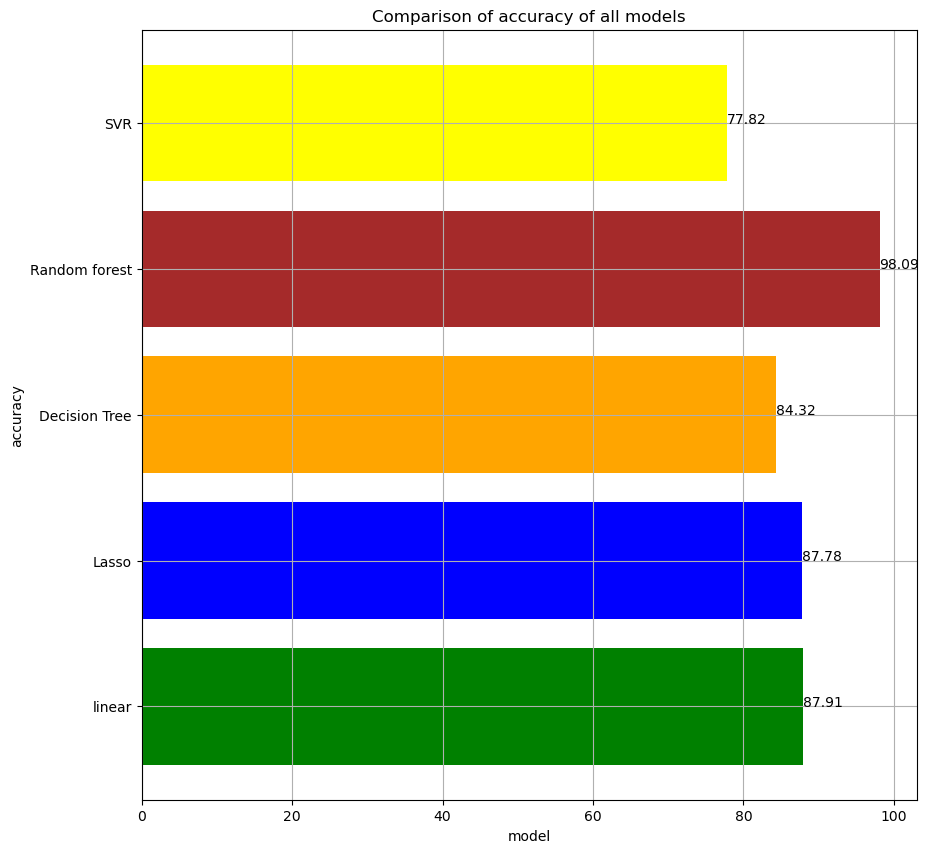

In [64]:
model = ["linear","Lasso","Decision Tree", "Random forest","SVR"]
accuracy = [score_linear,score_lasso,score_DT,score_RF,score_SVR]
colours=['green','blue','orange','brown','yellow']
plt.barh(model,accuracy,color =colours)
for index,value in enumerate(accuracy):
    plt.text(value,index,str("%.2f"%value))
plt.title("Comparison of accuracy of all models")
plt.xlabel('model')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

# the random forest regression has the highest predction rate rather than other models 